In [10]:
from model import AdaptationModel
from mesa import batch_run
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Define parameters
number_of_households = 5 # numbers of houshold agents in model
number_of_steps = 5 # number of time steps in model, each representing 1/4 year
time_of_flooding = 5 # time step at which flooding occurs
number_of_iterations = 2 # number of times the model is run per parameter combination selcted from the below prensented parameter space

# parameter space
subsidie_level = 0 # subsidy level in USD
information_bias = 0 # Risk perception bias of government 

In [12]:
# Define the list of flood choices
flood_choices = ["100yr", "500yr", "harvey"]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame()

# Run the code for each flood choice
for flood_choice in flood_choices:
    params = {
    "number_of_households": number_of_households,
    "flood_map_choice": flood_choice, 
    "network": "watts_strogatz", 
    "probability_of_network_connection": 0.4,
    "number_of_edges": 3,
    "number_of_nearest_neighbours": 5,
    "time_of_flooding": time_of_flooding,
    "subsidie_level": subsidie_level,
    "information_bias": information_bias
    }
    
    # Create the batch runner
    results = batch_run(
        AdaptationModel,
        parameters=params,
        iterations=number_of_iterations, # number of model runs for each combination of parameters
        max_steps=number_of_steps, # maximum number of steps for each model run
        number_processes=1, # number of processes to use
        data_collection_period = -1,
    )
    
    # Convert the results to a DataFrame and add the flood choice
    results_df_temp = pd.DataFrame(results)
    results_df_temp['flood_choice'] = flood_choice

    # Append the results to the results DataFrame
    results_df = pd.concat([results_df, results_df_temp])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\jonas.klimt\AppData\Local\Temp\ipykernel_8920\122047769.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, results_df_temp])


  0%|          | 0/2 [00:00<?, ?it/s]

In [13]:
# Reset the index of the results DataFrame
results_df = results_df.reset_index(drop=True)
results_df

,RunId,iteration,Step,number_of_households,flood_map_choice,network,probability_of_network_connection,number_of_edges,number_of_nearest_neighbours,time_of_flooding,...,PriorRiskPerception,FloodDepthActual,FloodDamageActual,IsAdapted,AdaptedAt,FriendsCount,Location,Savings,IncomeCategory,flood_choice
0,0,0,5,5,100yr,watts_strogatz,0.4,3,5,5,...,0.829845,0.461978,0.000000,True,4.0,4,POINT (281857.4580550814 3292090.078834202),13307.039489,middle,100yr
1,0,0,5,5,100yr,watts_strogatz,0.4,3,5,5,...,0.827266,0.517159,53316.773702,False,NaN,4,POINT (261456.44534377818 3287450.1870119874),15013.948762,low,100yr
2,0,0,5,5,100yr,watts_strogatz,0.4,3,5,5,...,0.828443,0.218796,38297.495696,False,NaN,4,POINT (221869.86195575417 3352145.4441728396),8734.522190,low,100yr
3,0,0,5,5,100yr,watts_strogatz,0.4,3,5,5,...,0.830965,0.000000,0.000000,False,NaN,4,POINT (234185.44436829124 3334139.2091702833),225562.204119,high,100yr
4,0,0,5,5,100yr,watts_strogatz,0.4,3,5,5,...,0.827679,0.000000,0.000000,False,NaN,4,POINT (281653.6316845588 3308124.775130533),19412.557801,low,100yr
5,1,1,5,5,100yr,watts_strogatz,0.4,3,5,5,...,0.829246,0.661707,57620.197967,False,NaN,4,POINT (258883.76703603187 3289323.2420009905),37955.813056,middle,100yr
6,1,1,5,5,100yr,watts_strogatz,0.4,3,5,5,...,0.823671,0.000000,0.000000,False,NaN,4,POINT (256927.76909074216 3341698.3272041874),39302.813048,middle,100yr
7,1,1,5,5,100yr,watts_strogatz,0.4,3,5,5,...,0.830273,0.000000,0.000000,False,NaN,4,POINT (222972.01336963172 3337735.890879342),9407.716659,low,100yr
8,1,1,5,5,100yr,watts_strogatz,0.4,3,5,5,...,0.825847,0.285168,42923.324365,False,NaN,4,POINT (249519.61899081303 3330889.0480918987),145021.039812,high,100yr
9,1,1,5,5,100yr,watts_strogatz,0.4,3,5,5,...,0.827760,0.000000,0.000000,False,NaN,4,POINT (243928.7555276941 3314911.180686616),13194.086126,low,100yr


In [17]:
selected_columns = results_df[['FloodDamageActual', "Step", "AgentID", "flood_map_choice"]]

# Group by "flood_map_choice", "Step" and "AgentID" and calculate the mean
step_agent_mean = selected_columns.groupby(['flood_map_choice', 'Step', 'AgentID']).mean()

# Group by "flood_map_choice" and "Step" and calculate the sum
step_sum = selected_columns.groupby(['flood_map_choice', 'Step'])['FloodDamageActual'].sum()

# Reset the index to make "flood_map_choice" and "Step" columns again
step_sum = step_sum.reset_index()
step_sum


,flood_map_choice,Step,FloodDamageActual
0,100yr,5,192157.791730
1,500yr,5,211055.925571
2,harvey,5,370158.809920


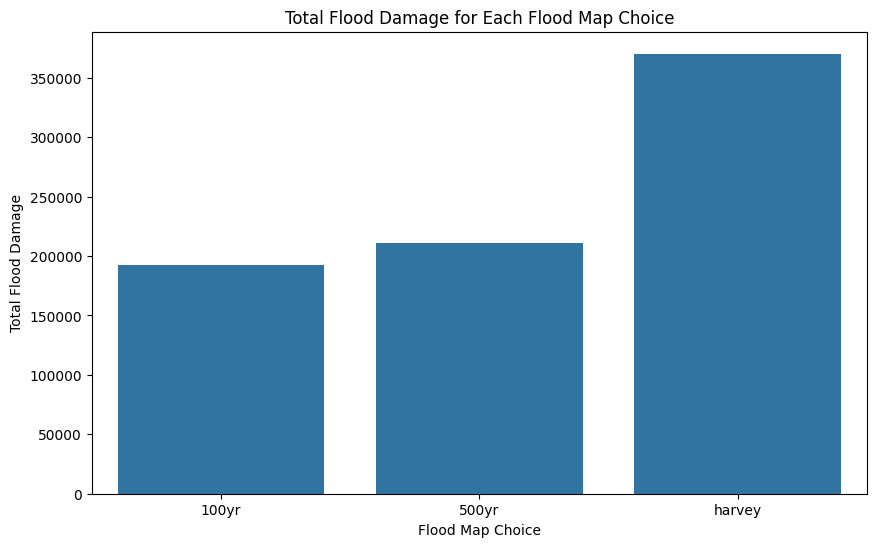

In [18]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='flood_map_choice', y='FloodDamageActual', data=step_sum)

# Add labels and title
plt.xlabel('Flood Map Choice')
plt.ylabel('Total Flood Damage')
plt.title('Total Flood Damage for Each Flood Map Choice')

# Show the plot
plt.show()